# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\Vishal Master\Projects\weatherAUS.csv")

In [3]:
df.head(20)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   01-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1   02-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2   03-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3   04-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4   05-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   
5   06-12-2008   Albury     14.6     29.7       0.2          NaN       NaN   
6   07-12-2008   Albury     14.3     25.0       0.0          NaN       NaN   
7   08-12-2008   Albury      7.7     26.7       0.0          NaN       NaN   
8   09-12-2008   Albury      9.7     31.9       0.0          NaN       NaN   
9   10-12-2008   Albury     13.1     30.1       1.4          NaN       NaN   
10  11-12-2008   Albury     13.4     30.4       0.0          NaN       NaN   
11  12-12-2008   Albury     15.9     21.7       2.2          NaN       NaN   
12  13-12-2008   Albury     15.9     18.6      15.6          NaN       NaN   
13  14-12-2008   Albury     12.6     21.0       3.6          NaN       NaN   
14  16-12-2008   Albury      9.8     27.7       NaN          NaN       NaN   
15  17-12-2008   Albury     14.1     20.9       0.0          NaN       NaN   
16  18-12-2008   Albury     13.5     22.9      16.8          NaN       NaN   
17  19-12-2008   Albury     11.2     22.5      10.6          NaN       NaN   
18  20-12-2008   Albury      9.8     25.6       0.0          NaN       NaN   
19  21-12-2008   Albury     11.5     29.3       0.0          NaN       NaN   

   WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0            W           44.0          W  ...        22.0       1007.7   
1          WNW           44.0        NNW  ...        25.0       1010.6   
2          WSW           46.0          W  ...        30.0       1007.6   
3           NE           24.0         SE  ...        16.0       1017.6   
4            W           41.0        ENE  ...        33.0       1010.8   
5          WNW           56.0          W  ...        23.0       1009.2   
6            W           50.0         SW  ...        19.0       1009.6   
7            W           35.0        SSE  ...        19.0       1013.4   
8          NNW           80.0         SE  ...         9.0       1008.9   
9            W           28.0          S  ...        27.0       1007.0   
10           N           30.0        SSE  ...        22.0       1011.8   
11         NNE           31.0         NE  ...        91.0       1010.5   
12           W           61.0        NNW  ...        93.0        994.3   
13          SW           44.0          W  ...        43.0       1001.2   
14         WNW           50.0        NaN  ...        28.0       1013.4   
15         ENE           22.0        SSW  ...        82.0       1012.2   
16           W           63.0          N  ...        65.0       1005.8   
17         SSE           43.0        WSW  ...        32.0       1009.4   
18         SSE           26.0         SE  ...        26.0       1019.2   
19           S           24.0         SE  ...        28.0       1019.3   

    Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0        1007.1       8.0       NaN     16.9     21.8         No      0.0   
1        1007.8       NaN       NaN     17.2     24.3         No      0.0   
2        1008.7       NaN       2.0     21.0     23.2         No      0.0   
3        1012.8       NaN       NaN     18.1     26.5         No      1.0   
4        1006.0       7.0       8.0     17.8     29.7         No      0.2   
5        1005.4       NaN       NaN     20.6     28.9         No      0.0   
6        1008.2       1.0       NaN     18.1     24.6         No      0.0   
7        1010.1       NaN       NaN     16.3     25.5         No      0.0   
8        1003.6       NaN       NaN     18.3     30.2         No      1.4   
9        1005.7       NaN       NaN     20.1  

In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [7]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

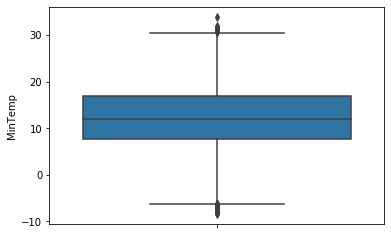

In [8]:
sns.boxplot(y="MinTemp",data=df)

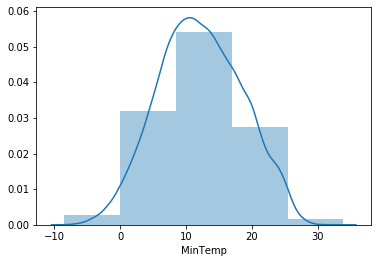

In [9]:
sns.distplot(df["MinTemp"],bins=5)

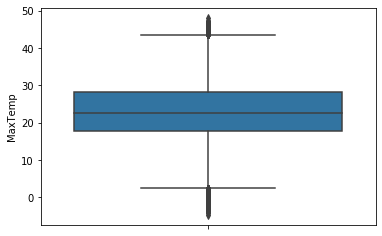

In [10]:
sns.boxplot(y="MaxTemp",data=df)

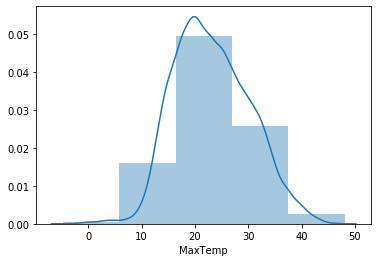

In [11]:
sns.distplot(df["MaxTemp"],bins=5)

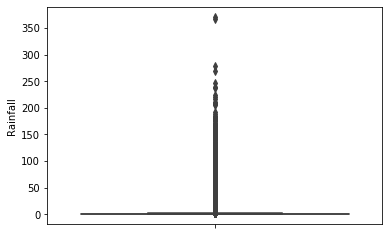

In [12]:
sns.boxplot(y="Rainfall",data=df)

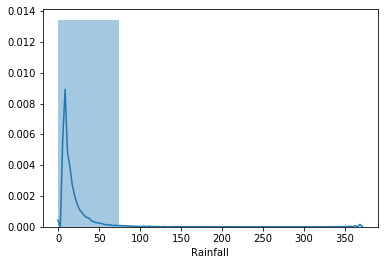

In [13]:
sns.distplot(df["Rainfall"],bins=5)

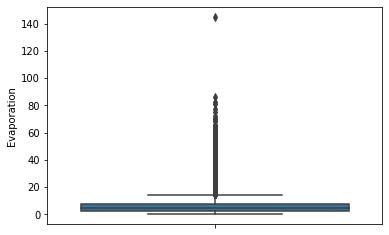

In [14]:
sns.boxplot(y="Evaporation",data=df)

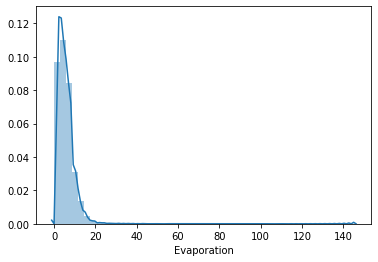

In [15]:
sns.distplot(df["Evaporation"])

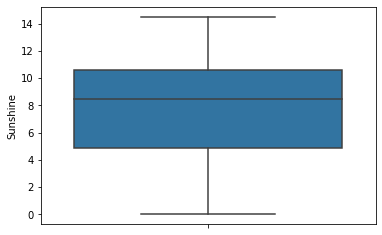

In [16]:
sns.boxplot(y="Sunshine",data=df)

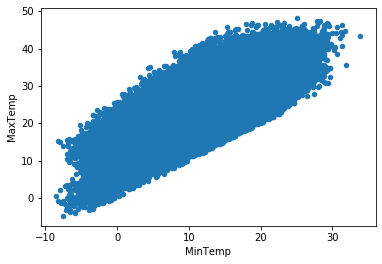

In [17]:
df.plot(x="MinTemp",y="MaxTemp",kind="scatter")

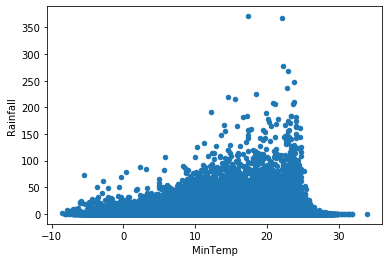

In [18]:
df.plot(x="MinTemp",y="Rainfall",kind="scatter")

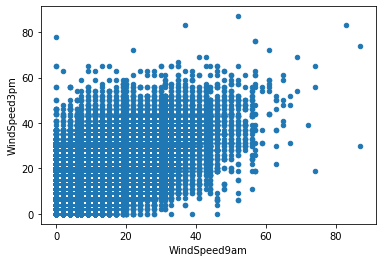

In [19]:
df.plot(x="WindSpeed9am",y="WindSpeed3pm",kind="scatter")

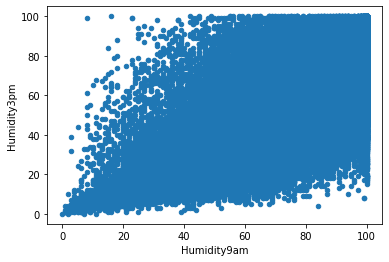

In [20]:
df.plot(x="Humidity9am",y="Humidity3pm",kind="scatter")

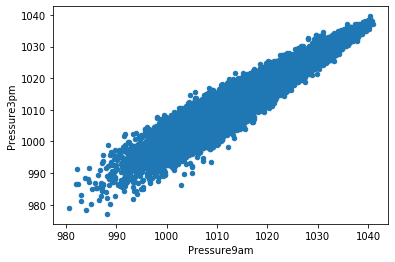

In [21]:
df.plot(x="Pressure9am",y="Pressure3pm",kind="scatter")

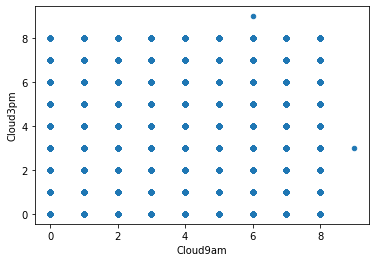

In [22]:
df.plot(x="Cloud9am",y="Cloud3pm",kind="scatter")

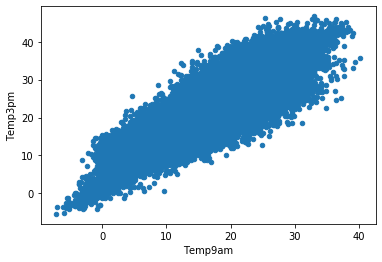

In [23]:
df.plot(x="Temp9am",y="Temp3pm",kind="scatter")

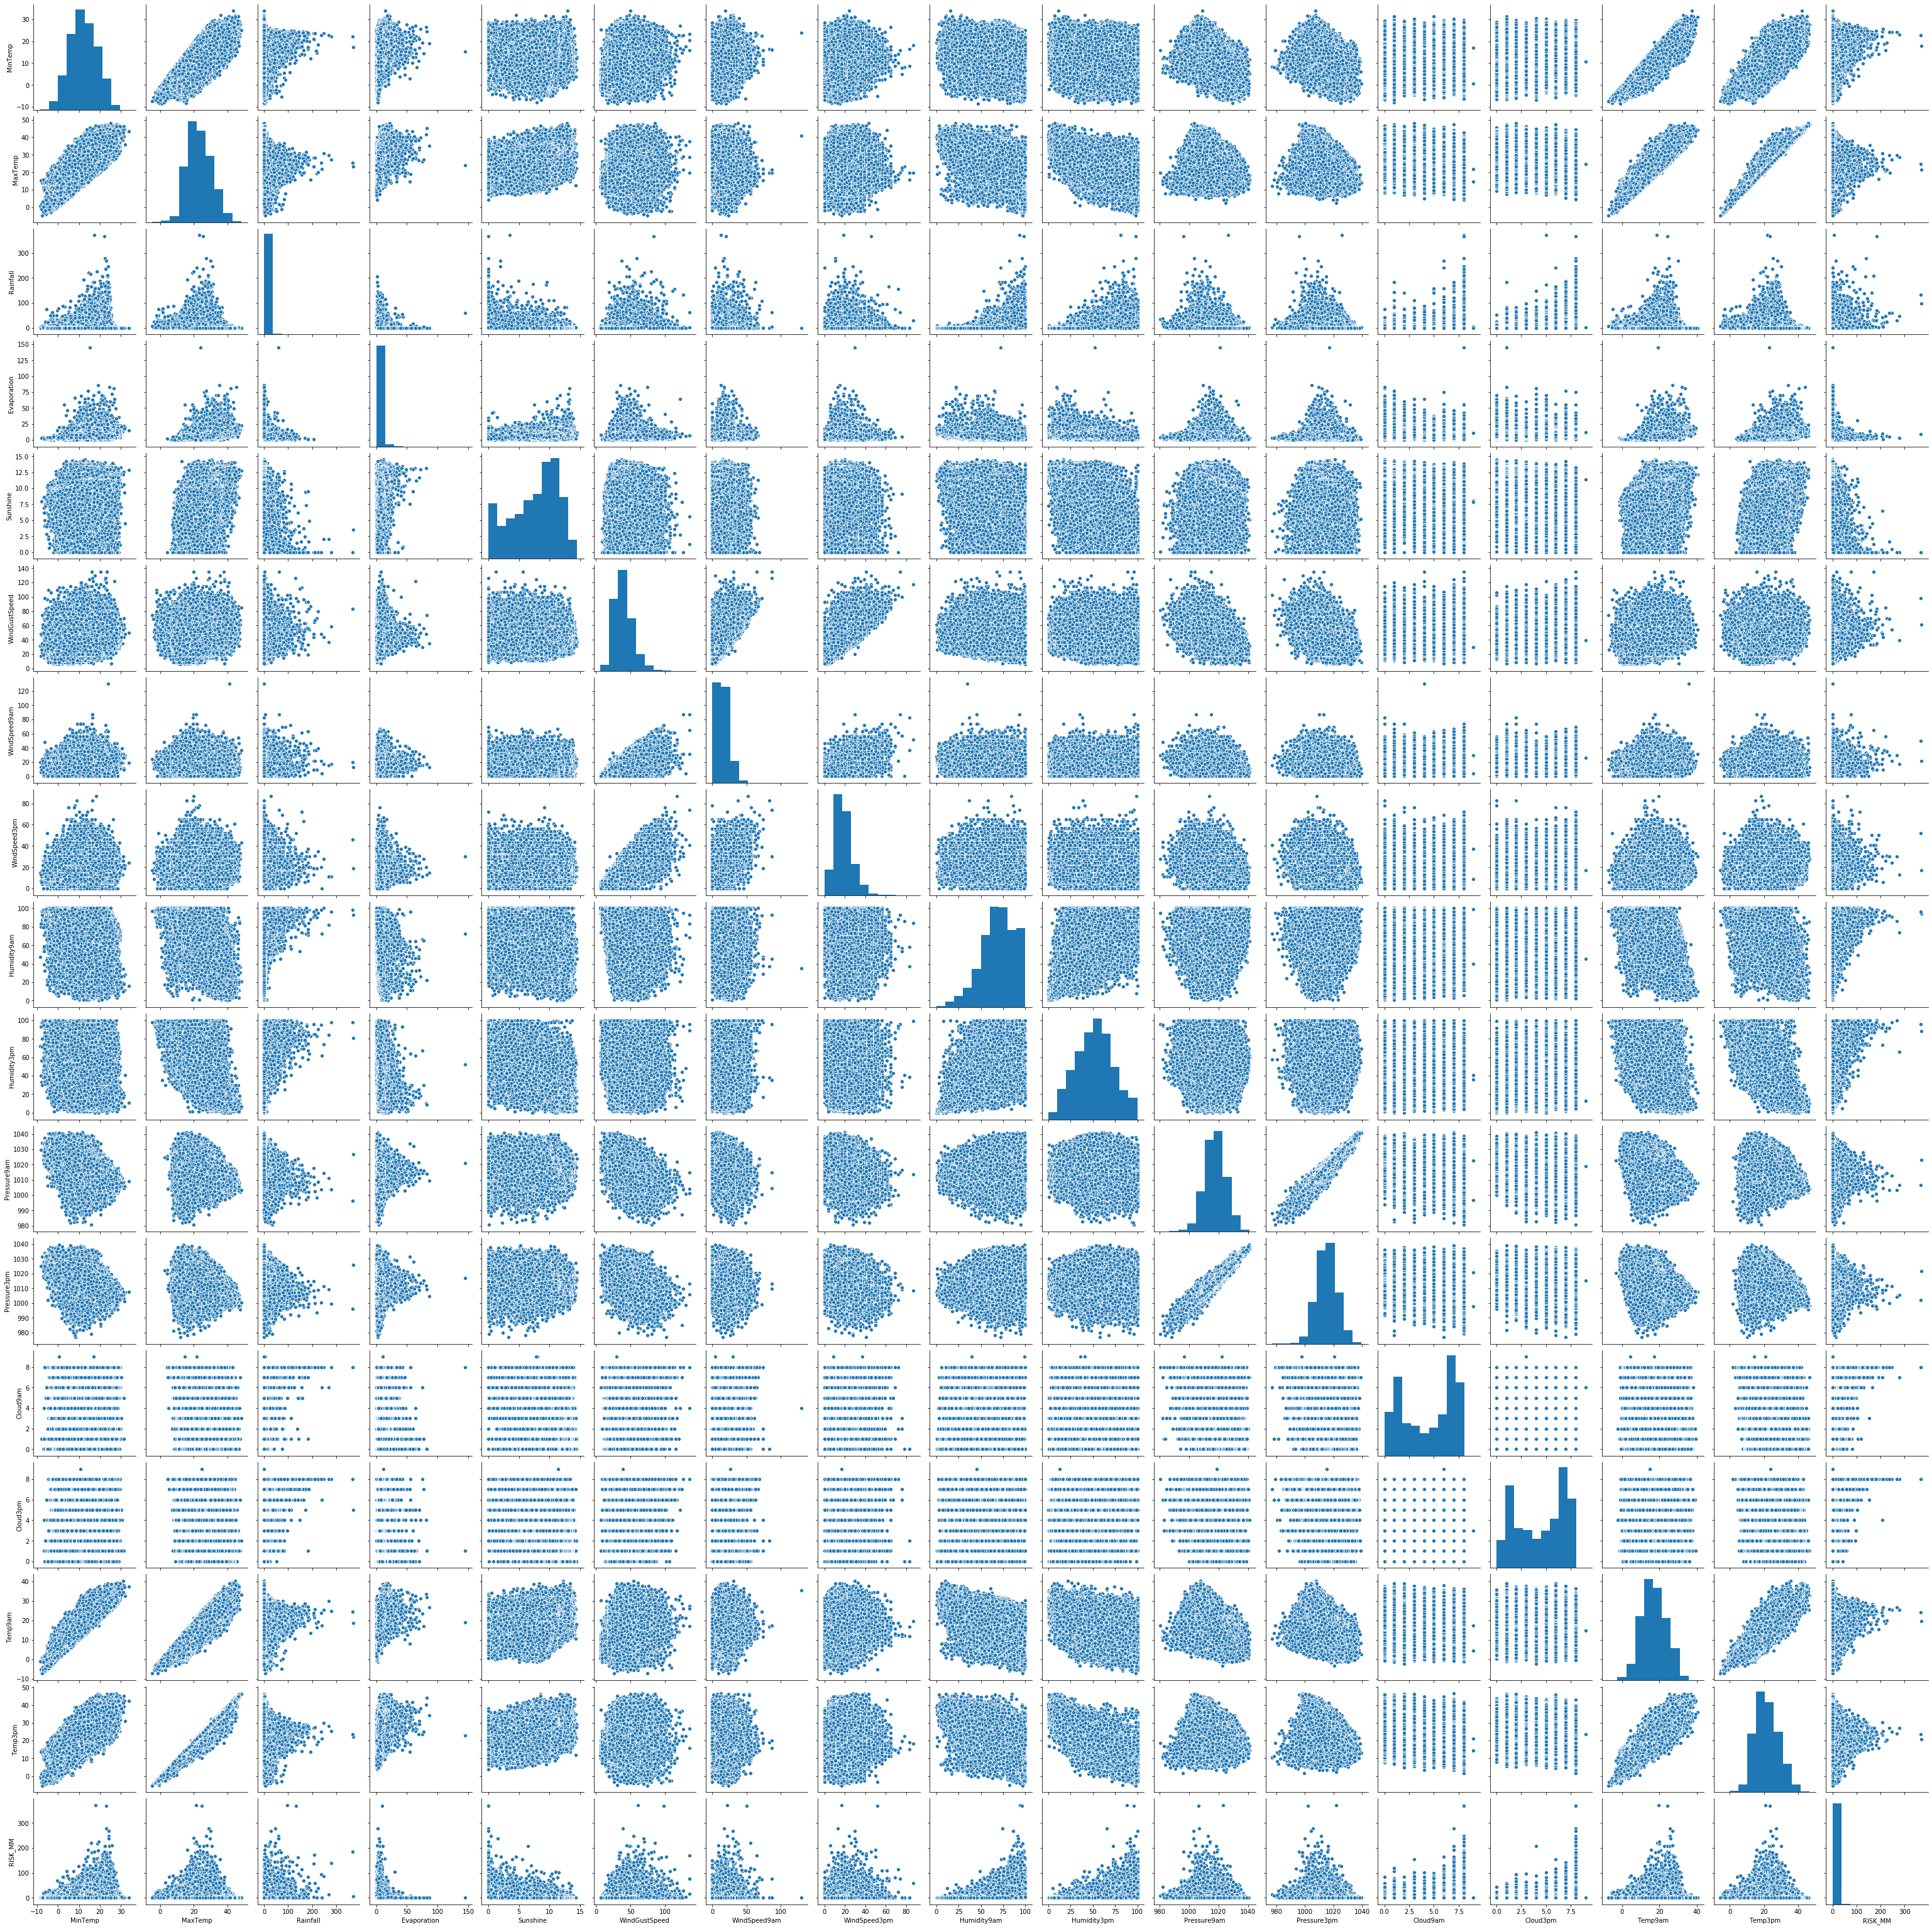

In [32]:
sns.pairplot(data=df)

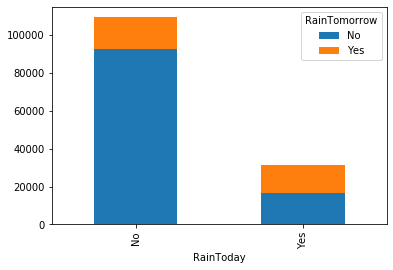

In [24]:
pd.crosstab(df['RainToday'],df['RainTomorrow']).plot(kind='bar',stacked=True) 


In [25]:
counts = df.groupby(['RainToday', 'RainTomorrow'], axis= 0)
counts.size() 

RainToday  RainTomorrow
No         No              92728
           Yes             16604
Yes        No              16858
           Yes             14597
dtype: int64

In [26]:
counts = df.groupby(['WindDir9am', 'WindDir3pm'], axis= 0)
counts.size() 

WindDir9am  WindDir3pm
E           E             1520
            ENE           1049
            ESE           1110
            N              412
            NE             655
                          ... 
WSW         SSW            655
            SW            1127
            W              835
            WNW            323
            WSW           1331
Length: 256, dtype: int64

In [27]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [28]:
df["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [29]:
df["WindDir9am"].describe()

count     132180
unique        16
top            N
freq       11393
Name: WindDir9am, dtype: object

In [30]:
df["WindDir9am"]=df["WindDir9am"].fillna("N")

In [31]:
df["WindDir9am"].isnull().sum()

0

In [32]:
df["WindDir3pm"].describe()

count     138415
unique        16
top           SE
freq       10663
Name: WindDir3pm, dtype: object

In [33]:
df["WindDir3pm"]=df["WindDir3pm"].fillna("SE")

In [34]:
df["WindDir3pm"].isnull().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [36]:
df["Sunshine"].describe()

count    74377.000000
mean         7.624853
std          3.781525
min          0.000000
25%          4.900000
50%          8.500000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [37]:
df["Sunshine"]=df["Sunshine"].fillna(value=df["Sunshine"].median())

In [38]:
df["Sunshine"].isnull().sum()

0

In [39]:
df["Rainfall"].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [40]:
df["Rainfall"]=df["Rainfall"].fillna(value=df["Rainfall"].median())

In [41]:
df["Rainfall"].isnull().sum()

0

In [42]:
df["MinTemp"].describe()

count    141556.000000
mean         12.186400
std           6.403283
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [43]:
df["MinTemp"]=df["MinTemp"].fillna(value=df["MinTemp"].mean())

In [44]:
df["MinTemp"].isnull().sum()

0

In [45]:
df["MaxTemp"].describe()

count    141871.000000
mean         23.226784
std           7.117618
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [46]:
df["MaxTemp"]=df["MaxTemp"].fillna(value=df["MaxTemp"].median())

In [47]:
df["MaxTemp"].isnull().sum()

0

In [48]:
df["Evaporation"].describe()

count    81350.000000
mean         5.469824
std          4.188537
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [49]:
df["Evaporation"]=df["Evaporation"].fillna(value=df["Evaporation"].median())

In [50]:
df["Evaporation"].isnull().sum()

0

In [51]:
df["WindSpeed9am"].describe()

count    140845.000000
mean         14.001988
std           8.893337
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

In [52]:
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(value=df["WindSpeed9am"].median())

In [53]:
df["WindSpeed9am"].isnull().sum()

0

In [54]:
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(value=df["WindSpeed3pm"].median())

In [55]:
df["WindSpeed3pm"].isnull().sum()

0

In [56]:
df["Humidity9am"].describe()

count    140419.000000
mean         68.843810
std          19.051293
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

In [57]:
df["Humidity9am"]=df["Humidity9am"].fillna(value=df["Humidity9am"].median())

In [58]:
df["Humidity9am"].isnull().sum()

0

In [59]:
df["Humidity3pm"]=df["Humidity3pm"].fillna(value=df["Humidity3pm"].median())

In [60]:
df["Humidity3pm"].isnull().sum()

0

In [61]:
df["Pressure9am"].describe()

count    128179.000000
mean       1017.653758
std           7.105476
min         980.500000
25%        1012.900000
50%        1017.600000
75%        1022.400000
max        1041.000000
Name: Pressure9am, dtype: float64

In [62]:
df["Pressure9am"]=df["Pressure9am"].fillna(value=df["Pressure9am"].mean())

In [63]:
df["Pressure9am"].isnull().sum()

0

In [64]:
df["Pressure3pm"].describe()

count    128212.000000
mean       1015.258204
std           7.036677
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64

In [65]:
df["Pressure3pm"]=df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean())

In [66]:
df["Pressure3pm"].isnull().sum()

0

In [67]:
df["Cloud9am"].describe()

count    88536.000000
mean         4.437189
std          2.887016
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

In [68]:
df["Cloud9am"]=df["Cloud9am"].fillna(value=df["Cloud9am"].median())

In [69]:
df["Cloud9am"].isnull().sum()

0

In [70]:
df["Cloud3pm"].describe()

count    85099.000000
mean         4.503167
std          2.720633
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

In [71]:
df["Cloud3pm"]=df["Cloud3pm"].fillna(value=df["Cloud3pm"].median())

In [72]:
df["Cloud3pm"].isnull().sum()

0

In [73]:
df["Temp9am"].describe()

count    141289.000000
mean         16.987509
std           6.492838
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64

In [74]:
df["Temp9am"]=df["Temp9am"].fillna(value=df["Temp9am"].mean())

In [75]:
df["Temp9am"].isnull().sum()

0

In [76]:
df["Temp3pm"].describe()

count    139467.000000
mean         21.687235
std           6.937594
min          -5.400000
25%          16.600000
50%          21.100000
75%          26.400000
max          46.700000
Name: Temp3pm, dtype: float64

In [77]:
df["Temp3pm"]=df["Temp3pm"].fillna(value=df["Temp3pm"].mean())

In [78]:
df["Temp3pm"].isnull().sum()

0

In [79]:
df["RainToday"].describe()

count     140787
unique         2
top           No
freq      109332
Name: RainToday, dtype: object

In [80]:
df["RainToday"]=df["RainToday"].fillna("No")

In [81]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9330
WindGustSpeed    9270
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

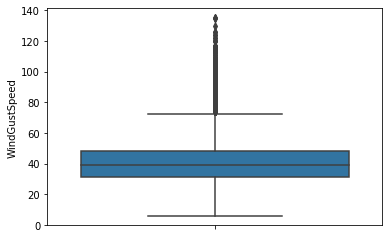

In [82]:
sns.boxplot(y="WindGustSpeed",data=df)

In [83]:
df["WindGustSpeed"].describe()

count    132923.000000
mean         39.984292
std          13.588801
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [84]:
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].median())

In [85]:
df["WindGustSpeed"].isnull().sum()

0

In [86]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9330
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [87]:
df["WindGustDir"].describe()

count     132863
unique        16
top            W
freq        9780
Name: WindGustDir, dtype: object

In [88]:
df["WindGustDir"]=df["WindGustDir"].fillna("W")

In [89]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [90]:
df["MinTemp"].describe()

count    142193.000000
mean         12.186400
std           6.388924
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [91]:
IQR=df["MinTemp"].quantile(0.75)-df["MinTemp"].quantile(0.25)
print(IQR)

9.200000000000001


In [92]:
upperlimit=df["MinTemp"].quantile(0.75)+(1.5*IQR)
lowerlimit=df["MinTemp"].quantile(0.25)-(1.5*IQR)
print(upperlimit)
print(lowerlimit)

30.6
-6.200000000000001


In [93]:
out_val1=df[(df["MinTemp"]>=upperlimit) | (df["MinTemp"]<=lowerlimit)]
out_val1

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
45610   15-05-2011    Canberra     -6.9     14.0       0.0          4.0   
45611   16-05-2011    Canberra     -6.5     11.1       0.0          2.0   
45668   15-07-2011    Canberra     -6.3     12.2       0.2          0.8   
45681   28-07-2011    Canberra     -6.3     15.2       0.0          2.0   
45682   29-07-2011    Canberra     -8.0     15.1       0.2          2.6   
...            ...         ...      ...      ...       ...          ...   
103015  07-02-2009     Woomera     31.4     46.2       0.0         22.0   
104748  12-02-2014     Woomera     31.4     43.6       0.0         17.2   
105423  19-12-2015     Woomera     31.8     44.6       0.0         17.6   
113509  12-01-2014  PearceRAAF     31.2     44.3       0.0          4.8   
140978  02-01-2014       Uluru     31.0     42.7       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
45610        8.5         NNW           30.0        NNW  ...        41.0   
45611        4.1           N           15.0          N  ...        66.0   
45668        8.5         ENE           26.0          N  ...        37.0   
45681        8.4         NNW           35.0          N  ...        31.0   
45682        7.9           W           39.0        NNW  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
103015      12.6         NNW           61.0         NW  ...         7.0   
104748      10.6           N           70.0         NE  ...        19.0   
105423       9.3         NNE           56.0        NNE  ...         7.0   
113509      12.2           E           54.0          N  ...        22.0   
140978       8.5         WSW           54.0        SSW  ...        16.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
45610        1030.1       1027.7       0.0       5.0      1.7     13.1   
45611        1031.5       1028.1       8.0       0.0      0.8      9.5   
45668        1037.2       1033.8       0.0       1.0      1.1     11.8   
45681        1030.8       1026.7       1.0       5.0     -1.0     14.5   
45682        1029.6       1025.3       1.0       5.0     -1.2     14.5   
...             ...          ...       ...       ...      ...      ...   
103015       1004.4       1003.0       1.0       1.0     37.9     45.3   
104748       1008.5       1005.8       5.0       5.0     34.2     41.2   
105423       1005.6       1001.4       5.0       5.0     36.9     42.3   
113509       1007.7       1007.8       5.0       5.0     40.2     35.8   
140978       1008.1       1005.6       5.0       5.0     34.4     41.2   

        RainToday  RISK_MM  RainTomorrow  
45610          No      0.0            No  
45611          No      0.0            No  
45668          No      0.0            No  
45681          No      0.2            No  
45682          No      0.0            No  
...           ...      ...           ...  
103015         No      0.0            No  
104748         No      0.8            No  
105423         No      0.4            No  
113509         No      0.0            No  
140978         No      0.0            No  

[62 rows x 24 columns]

In [94]:
out_val1.shape

(62, 24)

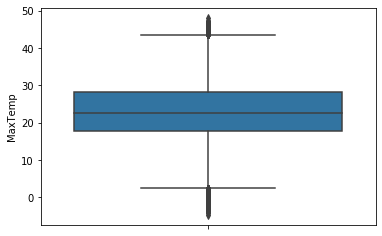

In [95]:
sns.boxplot(y="MaxTemp",data=df)

In [96]:
IQR2=df["MaxTemp"].quantile(0.75)-df["MaxTemp"].quantile(0.25)
print(IQR2)

10.3


In [97]:
upperlimit_1=df["MaxTemp"].quantile(0.75)+1.5*IQR2
lowerlimit_1=df["MaxTemp"].quantile(0.25)-1.5*IQR2
print(upperlimit_1)
print(lowerlimit_1)

43.65
2.4499999999999975


In [98]:
out_val2=df[(df["MaxTemp"]>=upperlimit_1) | (df["MaxTemp"]<=lowerlimit_1)]
out_val2

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
67      07-02-2009         Albury     22.3     44.8       0.0          4.8   
2880    10-02-2017         Albury     23.0     43.7       0.0          4.8   
4384    18-01-2013  BadgerysCreek     19.3     45.8       0.0          4.8   
5775    13-01-2017  BadgerysCreek     20.6     45.1       0.0          4.8   
5780    18-01-2017  BadgerysCreek     23.0     44.4       0.0          4.8   
...            ...            ...      ...      ...       ...          ...   
141275  09-12-2014          Uluru     26.0     43.8       0.0          4.8   
141280  14-12-2014          Uluru     21.4     44.0       0.0          4.8   
141317  20-01-2015          Uluru     28.6     43.7       0.0          4.8   
141602  02-11-2015          Uluru     26.4     43.7       0.0          4.8   
141634  05-12-2015          Uluru     20.0     44.1       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
67           8.5         NNW           59.0         SE  ...        11.0   
2880         8.5         WSW           44.0        SSE  ...        17.0   
4384         8.5         WNW           80.0          N  ...        15.0   
5775         8.5          NW           56.0        NNE  ...        27.0   
5780         8.5         WNW           52.0        WNW  ...        48.0   
...          ...         ...            ...        ...  ...         ...   
141275       8.5         SSW           69.0         NW  ...        14.0   
141280       8.5         NNW           41.0          N  ...         7.0   
141317       8.5         WSW           48.0        WSW  ...         8.0   
141602       8.5         WNW           69.0         NE  ...         7.0   
141634       8.5         NNW           57.0         NE  ...        10.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
67           1008.2       1003.8       5.0       5.0     29.6     43.4   
2880         1009.9       1006.1       5.0       5.0     28.2     42.4   
4384         1003.0        997.7       5.0       5.0     27.3     43.7   
5775         1008.3        999.3       5.0       5.0     25.6     41.0   
5780         1005.6       1005.8       5.0       5.0     37.6     30.9   
...             ...          ...       ...       ...      ...      ...   
141275       1007.4       1004.1       5.0       5.0     33.1     42.2   
141280       1007.8       1003.0       1.0       1.0     33.8     42.6   
141317       1007.2       1005.3       5.0       5.0     36.4     42.2   
141602       1005.8       1000.3       5.0       5.0     32.7     41.4   
141634       1010.5       1005.3       5.0       2.0     36.1     41.5   

        RainToday  RISK_MM  RainTomorrow  
67             No      0.0            No  
2880           No      0.0            No  
4384           No      0.8            No  
5775           No      0.0            No  
5780           No      0.2            No  
...           ...      ...           ...  
141275         No      0.2            No  
141280         No      0.0            No  
141317         No      0.0            No  
141602         No      0.8            No  
141634         No      0.0            No  

[459 rows x 24 columns]

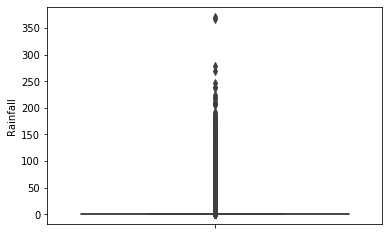

In [99]:
sns.boxplot(y="Rainfall",data=df)

In [100]:
IQR3=df["Rainfall"].quantile(0.75)-df["Rainfall"].quantile(0.25)
print(IQR3)

0.6


In [101]:
upperlimit_2=df["Rainfall"].quantile(0.75)+1.5*IQR3
lowerlimit_2=df["Rainfall"].quantile(0.25)-1.5*IQR3
print(upperlimit_2)
print(lowerlimit_2)

1.5
-0.8999999999999999


In [102]:
out_val3=df[(df["Rainfall"]>=upperlimit_2) | (df["Rainfall"]<=lowerlimit_2)]
out_val3

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
11      12-12-2008   Albury     15.9     21.7       2.2          4.8   
12      13-12-2008   Albury     15.9     18.6      15.6          4.8   
13      14-12-2008   Albury     12.6     21.0       3.6          4.8   
16      18-12-2008   Albury     13.5     22.9      16.8          4.8   
17      19-12-2008   Albury     11.2     22.5      10.6          4.8   
...            ...      ...      ...      ...       ...          ...   
142060  11-02-2017    Uluru     22.2     39.4       6.2          4.8   
142125  18-04-2017    Uluru     15.2     21.5       6.8          4.8   
142126  19-04-2017    Uluru     17.7     26.9      12.6          4.8   
142127  20-04-2017    Uluru     18.6     28.6      34.6          4.8   
142128  21-04-2017    Uluru     18.1     29.6       3.8          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
11           8.5         NNE           31.0         NE  ...        91.0   
12           8.5           W           61.0        NNW  ...        93.0   
13           8.5          SW           44.0          W  ...        43.0   
16           8.5           W           63.0          N  ...        65.0   
17           8.5         SSE           43.0        WSW  ...        32.0   
...          ...         ...            ...        ...  ...         ...   
142060       8.5           S           30.0          S  ...        25.0   
142125       8.5         ENE           30.0         NE  ...        65.0   
142126       8.5           S           35.0          E  ...        59.0   
142127       8.5           E           46.0          E  ...        56.0   
142128       8.5         SSE           35.0        SSE  ...        46.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
11           1010.5       1004.2       8.0       8.0     15.9     17.0   
12            994.3        993.0       8.0       8.0     17.4     15.8   
13           1001.2       1001.8       5.0       7.0     15.8     19.8   
16           1005.8       1002.2       8.0       1.0     18.0     21.5   
17           1009.4       1009.7       5.0       2.0     15.5     21.0   
...             ...          ...       ...       ...      ...      ...   
142060       1008.4       1004.9       5.0       4.0     28.6     38.7   
142125       1016.9       1015.3       3.0       8.0     19.0     21.2   
142126       1018.1       1014.7       7.0       8.0     19.0     26.0   
142127       1020.0       1015.8       8.0       5.0     19.8     26.9   
142128       1017.7       1014.5       1.0       8.0     20.3     28.0   

        RainToday  RISK_MM  RainTomorrow  
11            Yes     15.6           Yes  
12            Yes      3.6           Yes  
13            Yes      0.0            No  
16            Yes     10.6           Yes  
17            Yes      0.0            No  
...           ...      ...           ...  
142060        Yes      0.2            No  
142125        Yes     12.6           Yes  
142126        Yes     34.6           Yes  
142127        Yes      3.8           Yes  
142128        Yes      0.0            No  

[28559 rows x 24 columns]

In [103]:
df["Evaporation"].describe()

count    142193.000000
mean          5.183213
std           3.185401
min           0.000000
25%           4.000000
50%           4.800000
75%           5.400000
max         145.000000
Name: Evaporation, dtype: float64

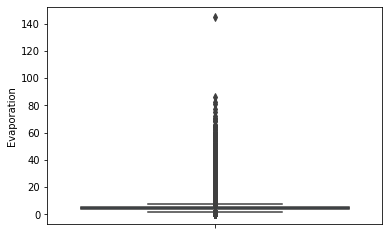

In [104]:
sns.boxplot(y="Evaporation",data=df)

In [105]:
IQR4=df["Evaporation"].quantile(0.75)-df["Evaporation"].quantile(0.25)
print(IQR4)

1.4000000000000004


In [106]:
upperlimit_3=df["Evaporation"].quantile(0.75)+1.5*IQR4
lowerlimit_3=df["Evaporation"].quantile(0.25)-1.5*IQR4
print(upperlimit_3)
print(lowerlimit_3)

7.500000000000001
1.8999999999999995


In [107]:
out_val4=df[(df["Evaporation"]>=upperlimit_3) | (df["Evaporation"]<=lowerlimit_3)]
out_val4

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5939    01-01-2009      Cobar     17.9     35.2       0.0         12.0   
5940    02-01-2009      Cobar     18.4     28.9       0.0         14.8   
5941    03-01-2009      Cobar     15.5     34.1       0.0         12.6   
5942    04-01-2009      Cobar     19.4     37.6       0.0         10.8   
5943    05-01-2009      Cobar     21.9     38.4       0.0         11.4   
...            ...        ...      ...      ...       ...          ...   
140656  08-06-2017  Katherine     10.9     27.8       0.0          8.0   
140657  09-06-2017  Katherine     11.6     26.7       0.0          7.8   
140662  14-06-2017  Katherine      8.7     29.6       0.0          8.0   
140664  16-06-2017  Katherine     10.6     30.8       0.0          8.0   
140668  20-06-2017  Katherine     15.0     32.0       0.0          9.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
5939        12.3         SSW           48.0        ENE  ...        13.0   
5940        13.0           S           37.0        SSE  ...         8.0   
5941        13.3          SE           30.0          N  ...         7.0   
5942        10.6         NNE           46.0        NNE  ...        22.0   
5943        12.2         WNW           31.0        WNW  ...        22.0   
...          ...         ...            ...        ...  ...         ...   
140656       8.5           E           61.0         SE  ...        52.0   
140657       8.5         ESE           41.0         SE  ...        52.0   
140662       8.5         ESE           35.0         SE  ...        52.0   
140664       8.5         ENE           31.0        ESE  ...        52.0   
140668       8.5           E           35.0         SE  ...        52.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  \
5939    1006.300000       1004.4       2.0       5.0  26.600000  33.400000   
5940    1012.900000       1012.1       1.0       1.0  20.300000  27.000000   
5941    1017.653758       1011.6       5.0       1.0  16.987509  32.700000   
5942    1012.300000       1009.2       1.0       6.0  28.700000  34.900000   
5943    1012.700000       1009.1       1.0       5.0  29.100000  35.600000   
...             ...          ...       ...       ...        ...        ...   
140656  1019.300000       1015.1       1.0       5.0  18.500000  21.687235   
140657  1020.000000       1015.9       6.0       5.0  17.500000  21.687235   
140662  1018.500000       1014.2       0.0       5.0  17.300000  21.687235   
140664  1016.200000       1011.9       0.0       5.0  19.300000  21.687235   
140668  1015.900000       1012.1       0.0       5.0  21.800000  21.687235   

        RainToday  RISK_MM  RainTomorrow  
5939           No      0.0            No  
5940           No      0.0            No  
5941           No      0.0            No  
5942           No      0.0            No  
5943           No      0.0            No  
...           ...      ...           ...  
140656         No      0.0            No  
140657         No      0.0            No  
140662         No      0.0            No  
140664         No      0.0            No  
140668         No      0.0            No  

[32317 rows x 24 columns]

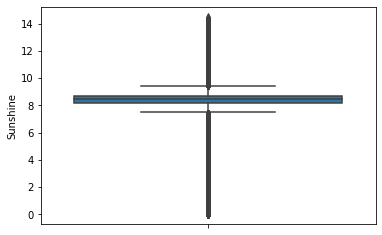

In [108]:
sns.boxplot(y="Sunshine",data=df)

In [109]:
IQR5=df["Sunshine"].quantile(0.75)-df["Sunshine"].quantile(0.25)
print(IQR5)

0.5


In [110]:
upperlimit_4=df["Sunshine"].quantile(0.75)+1.5*IQR5
lowerlimit_4=df["Sunshine"].quantile(0.25)-1.5*IQR5
print(upperlimit_4)
print(lowerlimit_4)

9.45
7.449999999999999


In [111]:
out_val5=df[(df["Sunshine"]>=upperlimit_4) | (df["Sunshine"]<=lowerlimit_4)]
out_val5

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5939    01-01-2009    Cobar     17.9     35.2       0.0         12.0   
5940    02-01-2009    Cobar     18.4     28.9       0.0         14.8   
5941    03-01-2009    Cobar     15.5     34.1       0.0         12.6   
5942    04-01-2009    Cobar     19.4     37.6       0.0         10.8   
5943    05-01-2009    Cobar     21.9     38.4       0.0         11.4   
...            ...      ...      ...      ...       ...          ...   
139107  19-06-2017   Darwin     21.9     33.0       0.0          5.2   
139108  20-06-2017   Darwin     19.3     33.4       0.0          6.0   
139110  22-06-2017   Darwin     20.7     32.8       0.0          5.6   
139111  23-06-2017   Darwin     19.5     31.8       0.0          6.2   
139112  24-06-2017   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
5939        12.3         SSW           48.0        ENE  ...        13.0   
5940        13.0           S           37.0        SSE  ...         8.0   
5941        13.3          SE           30.0          N  ...         7.0   
5942        10.6         NNE           46.0        NNE  ...        22.0   
5943        12.2         WNW           31.0        WNW  ...        22.0   
...          ...         ...            ...        ...  ...         ...   
139107      10.9           E           44.0         SE  ...        28.0   
139108      11.0         ENE           35.0         SE  ...        32.0   
139110      11.0           E           33.0          E  ...        23.0   
139111      10.6         ESE           26.0         SE  ...        58.0   
139112      10.7         ENE           30.0        ENE  ...        32.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am  Temp3pm  \
5939    1006.300000       1004.4       2.0       5.0  26.600000     33.4   
5940    1012.900000       1012.1       1.0       1.0  20.300000     27.0   
5941    1017.653758       1011.6       5.0       1.0  16.987509     32.7   
5942    1012.300000       1009.2       1.0       6.0  28.700000     34.9   
5943    1012.700000       1009.1       1.0       5.0  29.100000     35.6   
...             ...          ...       ...       ...        ...      ...   
139107  1014.600000       1010.6       1.0       1.0  25.100000     32.7   
139108  1013.900000       1010.5       0.0       1.0  24.500000     32.3   
139110  1015.300000       1011.8       0.0       0.0  24.800000     32.1   
139111  1014.900000       1010.7       1.0       1.0  24.800000     29.2   
139112  1013.900000       1009.7       6.0       5.0  25.400000     31.0   

        RainToday  RISK_MM  RainTomorrow  
5939           No      0.0            No  
5940           No      0.0            No  
5941           No      0.0            No  
5942           No      0.0            No  
5943           No      0.0            No  
...           ...      ...           ...  
139107         No      0.0            No  
139108         No      0.0            No  
139110         No      0.0            No  
139111         No      0.0            No  
139112         No      0.0            No  

[60823 rows x 24 columns]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

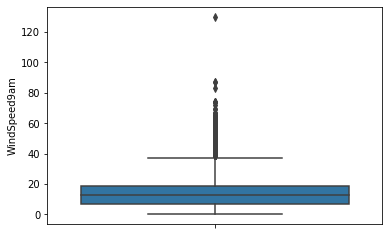

In [113]:
sns.boxplot(y="WindSpeed9am",data=df)

In [114]:
IQR6=df["WindSpeed9am"].quantile(0.75)-df["WindSpeed9am"].quantile(0.25)
print(IQR6)

12.0


In [115]:
upperlimit_5=df["WindSpeed9am"].quantile(0.75)+1.5*IQR6
lowerlimit_5=df["WindSpeed9am"].quantile(0.25)-1.5*IQR6
print(upperlimit_5)
print(lowerlimit_5)

37.0
-11.0


In [116]:
out_val6=df[(df["WindSpeed9am"]>=upperlimit_5) | (df["WindSpeed9am"]<=lowerlimit_5)]
out_val6

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
297     26-09-2009         Albury      6.8     12.2       6.0          4.8   
2438    26-11-2015         Albury     17.9     21.3       0.0          4.8   
3192    03-07-2009  BadgerysCreek      7.5     15.3       0.0          4.8   
3277    26-09-2009  BadgerysCreek     14.1     18.8       0.0          4.8   
3627    16-10-2010  BadgerysCreek      9.9     15.4       0.0          4.8   
...            ...            ...      ...      ...       ...          ...   
140919  04-11-2013          Uluru     21.3     38.3       0.0          4.8   
140988  12-01-2014          Uluru     26.2     41.6       0.0          4.8   
141258  22-11-2014          Uluru     21.2     42.1       0.0          4.8   
141582  13-10-2015          Uluru     19.1     36.6       0.0          4.8   
141585  16-10-2015          Uluru     24.9     39.9       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
297          8.5         WNW           56.0        WNW  ...        72.0   
2438         8.5           W           63.0          W  ...        24.0   
3192         8.5         WSW           67.0        WSW  ...        46.0   
3277         8.5          NW           80.0        WNW  ...        25.0   
3627         8.5           W           78.0          W  ...        40.0   
...          ...         ...            ...        ...  ...         ...   
140919       8.5         ENE           57.0          E  ...         9.0   
140988       8.5         ESE           63.0        ENE  ...        10.0   
141258       8.5           W           76.0        NNW  ...        14.0   
141582       8.5           E           46.0          E  ...         9.0   
141585       8.5           S           69.0         SE  ...         8.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
297          1005.2       1003.9       7.0       6.0      7.9     11.1   
2438         1004.0       1008.2       5.0       5.0     18.7     19.9   
3192         1004.4       1005.0       5.0       5.0     12.1     14.0   
3277         1004.9       1004.9       5.0       5.0     16.1     17.1   
3627         1000.8       1004.4       5.0       5.0     11.0     14.4   
...             ...          ...       ...       ...      ...      ...   
140919       1018.4       1013.9       5.0       5.0     28.8     36.9   
140988       1011.0       1006.4       5.0       5.0     34.6     40.3   
141258       1009.1       1004.7       1.0       3.0     33.3     39.5   
141582       1019.3       1014.5       5.0       5.0     26.1     35.3   
141585       1015.2       1010.9       5.0       7.0     30.5     36.7   

        RainToday  RISK_MM  RainTomorrow  
297           Yes      1.6           Yes  
2438           No      0.0            No  
3192           No      0.0            No  
3277           No      0.0            No  
3627           No      0.0            No  
...           ...      ...           ...  
140919         No      0.0            No  
140988         No      0.0            No  
141258         No      1.2           Yes  
141582         No      0.0            No  
141585         No      0.0            No  

[2313 rows x 24 columns]

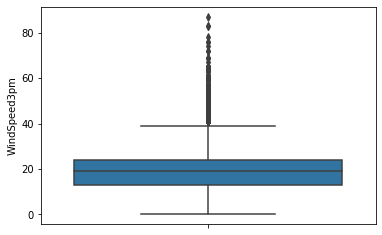

In [117]:
sns.boxplot(y="WindSpeed3pm",data=df)

In [118]:
IQR7=df["WindSpeed3pm"].quantile(0.75)-df["WindSpeed3pm"].quantile(0.25)
print(IQR7)

11.0


In [119]:
upperlimit_6=df["WindSpeed3pm"].quantile(0.75)+1.5*IQR7
lowerlimit_6=df["WindSpeed3pm"].quantile(0.25)-1.5*IQR7
print(upperlimit_6)
print(lowerlimit_6)

40.5
-3.5


In [120]:
out_val7=df[(df["WindSpeed3pm"]>=upperlimit_6) | (df["WindSpeed3pm"]<=lowerlimit_6)]
out_val7

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
51      22-01-2009   Albury     24.4     34.0       0.6          4.8   
354     22-11-2009   Albury     18.3     28.3      25.8          4.8   
379     17-12-2009   Albury     14.5     40.3       0.0          4.8   
1608    12-08-2013   Albury      5.8     14.9      17.2          4.8   
1673    17-10-2013   Albury     11.2     17.7       0.0          4.8   
...            ...      ...      ...      ...       ...          ...   
140884  30-09-2013    Uluru     15.0     36.8       0.0          4.8   
141843  09-07-2016    Uluru      8.6     27.8       0.0          4.8   
141924  28-09-2016    Uluru     19.8     30.5       0.0          4.8   
141928  02-10-2016    Uluru     18.2     27.3       2.0          4.8   
142013  26-12-2016    Uluru     22.1     27.4      83.8          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
51           8.5          NW           98.0          N  ...        39.0   
354          8.5         NNW           61.0          N  ...        67.0   
379          8.5          NW          107.0          S  ...        28.0   
1608         8.5           W           69.0         NW  ...        54.0   
1673         8.5         WNW           69.0        WNW  ...        43.0   
...          ...         ...            ...        ...  ...         ...   
140884       8.5         NNW           70.0          N  ...        15.0   
141843       8.5         NNW           65.0          N  ...        25.0   
141924       8.5           W           76.0         NW  ...        13.0   
141928       8.5           W           65.0          W  ...        11.0   
142013       8.5         ENE           72.0          N  ...       100.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
51           1005.3        997.8       4.0       1.0     26.1     33.1   
354          1003.7       1003.5       8.0       8.0     19.2     25.6   
379          1008.9       1005.7       5.0       2.0     24.2     31.4   
1608         1004.3       1006.0       8.0       5.0     12.7     13.0   
1673         1006.3       1012.0       8.0       1.0     13.9     14.8   
...             ...          ...       ...       ...      ...      ...   
140884       1010.6       1005.8       5.0       5.0     29.0     35.3   
141843       1015.4       1010.1       5.0       5.0     16.3     27.6   
141924       1007.7       1005.3       5.0       5.0     24.9     29.8   
141928       1006.3       1005.6       1.0       5.0     21.4     26.1   
142013        994.6        989.2       8.0       8.0     22.2     24.2   

        RainToday  RISK_MM  RainTomorrow  
51             No      6.4           Yes  
354           Yes      0.4            No  
379            No      3.0           Yes  
1608          Yes      1.2           Yes  
1673           No      0.0            No  
...           ...      ...           ...  
140884         No      0.0            No  
141843         No     13.6           Yes  
141924         No      0.0            No  
141928        Yes      0.0            No  
142013        Yes     63.8           Yes  

[2458 rows x 24 columns]

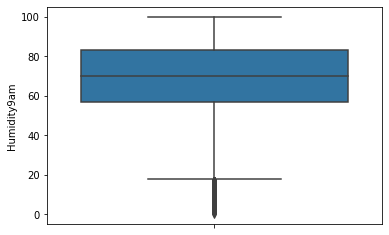

In [121]:
sns.boxplot(y="Humidity9am",data=df)

In [122]:
IQR8=df["Humidity9am"].quantile(0.75)-df["Humidity9am"].quantile(0.25)
print(IQR8)

26.0


In [123]:
upperlimit_7=df["Humidity9am"].quantile(0.75)+1.5*IQR8
lowerlimit_7=df["Humidity9am"].quantile(0.25)-1.5*IQR8
print(upperlimit_7)
print(lowerlimit_7)

122.0
18.0


In [124]:
out_val8=df[(df["Humidity9am"]>=upperlimit_7) | (df["Humidity9am"]<=lowerlimit_7)]
out_val8

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2462    20-12-2015   Albury     19.7     41.5       0.0          4.8   
6192    12-09-2009    Cobar     12.0     30.1       0.0          7.6   
6193    13-09-2009    Cobar     14.5     32.7       0.0         10.8   
6195    15-09-2009    Cobar      8.1     24.2       0.0          6.4   
6210    30-09-2009    Cobar      7.4     27.6       0.0          5.8   
...            ...      ...      ...      ...       ...          ...   
141999  12-12-2016    Uluru     14.7     37.6       0.0          4.8   
142000  13-12-2016    Uluru     16.7     41.7       0.0          4.8   
142075  27-02-2017    Uluru     17.5     38.0       0.0          4.8   
142076  28-02-2017    Uluru     15.9     38.2       0.0          4.8   
142087  11-03-2017    Uluru     22.0     37.4       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
2462         8.5         NNW           63.0          N  ...        13.0   
6192        11.2         NNW           44.0          N  ...         6.0   
6193        11.0          NW           46.0          N  ...         7.0   
6195        10.6          SW           24.0        SSE  ...        14.0   
6210        11.9           N           35.0        NNE  ...         6.0   
...          ...         ...            ...        ...  ...         ...   
141999       8.5         ENE           43.0        ENE  ...         6.0   
142000       8.5          SW           61.0        NNE  ...         7.0   
142075       8.5         SSE           37.0          E  ...        10.0   
142076       8.5         SSE           37.0          E  ...         8.0   
142087       8.5         SSW           35.0        ESE  ...        21.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2462         1008.3       1002.3       5.0       1.0     33.7     39.5   
6192         1022.1       1018.6       0.0       0.0     21.8     29.1   
6193         1018.8       1015.8       0.0       0.0     22.9     32.2   
6195         1020.9       1016.9       5.0       3.0     17.8     24.1   
6210         1018.0       1013.1       1.0       0.0     20.6     26.7   
...             ...          ...       ...       ...      ...      ...   
141999       1012.1       1007.5       5.0       5.0     29.1     36.3   
142000       1006.1       1002.6       5.0       5.0     33.2     41.1   
142075       1013.5       1009.6       5.0       5.0     26.8     36.8   
142076       1012.5       1008.8       5.0       5.0     28.3     37.8   
142087       1011.4       1007.7       6.0       5.0     29.4     36.1   

        RainToday  RISK_MM  RainTomorrow  
2462           No     10.0           Yes  
6192           No      0.0            No  
6193           No      0.0            No  
6195           No      0.0            No  
6210           No      0.0            No  
...           ...      ...           ...  
141999         No      0.0            No  
142000         No      0.0            No  
142075         No      0.0            No  
142076         No      0.0            No  
142087         No      0.0            No  

[1618 rows x 24 columns]

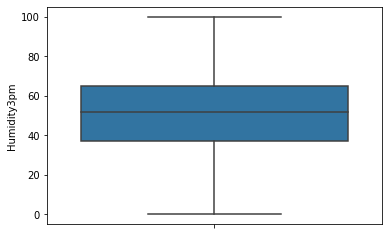

In [125]:
sns.boxplot(y="Humidity3pm",data=df)

In [126]:
IQR9=df["Humidity3pm"].quantile(0.75)-df["Humidity9am"].quantile(0.25)
print(IQR9)

8.0


In [127]:
upperlimit_8=df["Humidity3pm"].quantile(0.75)+1.5*IQR9
lowerlimit_8=df["Humidity3pm"].quantile(0.25)-1.5*IQR9
print(upperlimit_8)
print(lowerlimit_8)

77.0
25.0


In [128]:
out_val9=df[(df["Humidity3pm"]>=upperlimit_8) | (df["Humidity3pm"]<=lowerlimit_8)]
out_val9

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Albury     13.4     22.9       0.6          4.8   
1       02-12-2008   Albury      7.4     25.1       0.0          4.8   
3       04-12-2008   Albury      9.2     28.0       0.0          4.8   
5       06-12-2008   Albury     14.6     29.7       0.2          4.8   
6       07-12-2008   Albury     14.3     25.0       0.0          4.8   
...            ...      ...      ...      ...       ...          ...   
142185  17-06-2017    Uluru      6.4     23.4       0.0          4.8   
142189  21-06-2017    Uluru      2.8     23.4       0.0          4.8   
142190  22-06-2017    Uluru      3.6     25.3       0.0          4.8   
142191  23-06-2017    Uluru      5.4     26.9       0.0          4.8   
142192  24-06-2017    Uluru      7.8     27.0       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            8.5           W           44.0          W  ...        22.0   
1            8.5         WNW           44.0        NNW  ...        25.0   
3            8.5          NE           24.0         SE  ...        16.0   
5            8.5         WNW           56.0          W  ...        23.0   
6            8.5           W           50.0         SW  ...        19.0   
...          ...         ...            ...        ...  ...         ...   
142185       8.5         ESE           31.0          S  ...        25.0   
142189       8.5           E           31.0         SE  ...        24.0   
142190       8.5         NNW           22.0         SE  ...        21.0   
142191       8.5           N           37.0         SE  ...        24.0   
142192       8.5          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       5.0     16.9     21.8   
1            1010.6       1007.8       5.0       5.0     17.2     24.3   
3            1017.6       1012.8       5.0       5.0     18.1     26.5   
5            1009.2       1005.4       5.0       5.0     20.6     28.9   
6            1009.6       1008.2       1.0       5.0     18.1     24.6   
...             ...          ...       ...       ...      ...      ...   
142185       1025.8       1023.0       5.0       5.0     11.2     23.1   
142189       1024.6       1020.3       5.0       5.0     10.1     22.4   
142190       1023.5       1019.1       5.0       5.0     10.9     24.5   
142191       1021.0       1016.8       5.0       5.0     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
3              No      1.0            No  
5              No      0.0            No  
6              No      0.0            No  
...           ...      ...           ...  
142185         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[33433 rows x 24 columns]

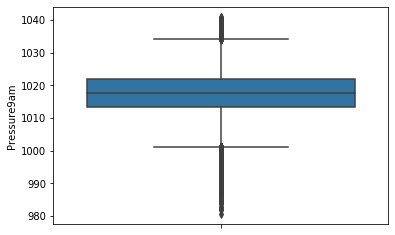

In [129]:
sns.boxplot(y="Pressure9am",data=df)

In [130]:
IQR10=df["Pressure9am"].quantile(0.75)-df["Pressure9am"].quantile(0.25)
print(IQR10)

8.299999999999955


In [131]:
upperlimit_9=df["Pressure9am"].quantile(0.75)+1.5*IQR10
lowerlimit_9=df["Pressure9am"].quantile(0.25)-1.5*IQR10
print(upperlimit_9)
print(lowerlimit_9)

1034.25
1001.0500000000001


In [132]:
out_val10=df[(df["Pressure9am"]>=upperlimit_9) | (df["Pressure9am"]<=lowerlimit_9)]
out_val10

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
12      13-12-2008     Albury     15.9     18.6      15.6          4.8   
294     23-09-2009     Albury      9.3     16.8      28.8          4.8   
315     14-10-2009     Albury      9.5     15.1       7.0          4.8   
361     29-11-2009     Albury     12.8     22.3       9.4          4.8   
458     12-03-2010     Albury     10.6     25.0       0.0          4.8   
...            ...        ...      ...      ...       ...          ...   
140503  02-01-2017  Katherine     23.2     31.0      69.0          4.8   
141306  09-01-2015      Uluru     22.5     27.1       7.2          4.8   
142013  26-12-2016      Uluru     22.1     27.4      83.8          4.8   
142014  27-12-2016      Uluru     22.1     35.8      63.8          4.8   
142015  28-12-2016      Uluru     22.6     36.8       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
12           8.5           W           61.0        NNW  ...        93.0   
294          8.5           W           56.0          W  ...        54.0   
315          8.5           W           65.0        WNW  ...        60.0   
361          8.5         WNW           46.0        WSW  ...        54.0   
458          8.5         NNE           20.0          S  ...        40.0   
...          ...         ...            ...        ...  ...         ...   
140503       8.5         NNW           28.0        NNE  ...        52.0   
141306       8.5           S           48.0          S  ...        97.0   
142013       8.5         ENE           72.0          N  ...       100.0   
142014       8.5         WNW           43.0        WNW  ...        41.0   
142015       8.5          NW           50.0         NW  ...        39.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am    Temp3pm  \
12            994.3        993.0       8.0       8.0     17.4  15.800000   
294           997.8       1003.8       5.0       8.0     13.1  15.900000   
315          1000.5       1002.7       8.0       1.0     10.3  14.100000   
361          1000.5       1000.9       8.0       4.0     13.5  20.700000   
458          1036.3       1033.6       5.0       5.0     14.2  24.100000   
...             ...          ...       ...       ...      ...        ...   
140503       1000.2        998.0       8.0       5.0     25.5  21.687235   
141306        999.2        997.4       7.0       6.0     24.6  22.800000   
142013        994.6        989.2       8.0       8.0     22.2  24.200000   
142014        997.8        995.2       4.0       2.0     26.0  33.500000   
142015       1000.0        998.8       5.0       5.0     29.7  34.000000   

        RainToday  RISK_MM  RainTomorrow  
12            Yes      3.6           Yes  
294           Yes      1.4           Yes  
315           Yes      1.4           Yes  
361           Yes      2.4           Yes  
458            No      0.0            No  
...           ...      ...           ...  
140503        Yes      6.4           Yes  
141306        Yes      8.6           Yes  
142013        Yes     63.8           Yes  
142014        Yes      0.0            No  
142015         No      0.0            No  

[2708 rows x 24 columns]

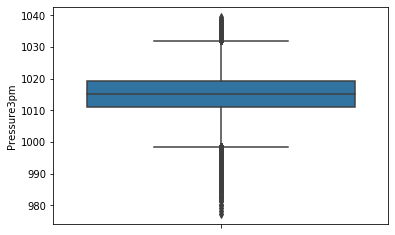

In [133]:
sns.boxplot(y="Pressure3pm",data=df)

In [134]:
IQR11=df["Pressure3pm"].quantile(0.75)-df["Pressure3pm"].quantile(0.25)
print(IQR11)

8.399999999999977


In [135]:
upperlimit_10=df["Pressure3pm"].quantile(0.75)+1.5*IQR11
lowerlimit_10=df["Pressure3pm"].quantile(0.25)-1.5*IQR11
print(upperlimit_10)
print(lowerlimit_10)

1032.0
998.4000000000001


In [136]:
out_val11=df[(df["Pressure3pm"]>=upperlimit_10) | (df["Pressure3pm"]<=lowerlimit_10)]
out_val11

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
12      13-12-2008   Albury     15.9     18.6      15.6          4.8   
51      22-01-2009   Albury     24.4     34.0       0.6          4.8   
270     29-08-2009   Albury      7.2     17.9       4.2          4.8   
314     13-10-2009   Albury      6.6     17.7       2.0          4.8   
458     12-03-2010   Albury     10.6     25.0       0.0          4.8   
...            ...      ...      ...      ...       ...          ...   
141009  02-02-2014    Uluru     27.5     40.4       0.0          4.8   
141273  07-12-2014    Uluru     22.0     41.8       5.8          4.8   
141306  09-01-2015    Uluru     22.5     27.1       7.2          4.8   
142013  26-12-2016    Uluru     22.1     27.4      83.8          4.8   
142014  27-12-2016    Uluru     22.1     35.8      63.8          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
12           8.5           W           61.0        NNW  ...        93.0   
51           8.5          NW           98.0          N  ...        39.0   
270          8.5           W           59.0         NE  ...        80.0   
314          8.5           N           50.0          N  ...        71.0   
458          8.5         NNE           20.0          S  ...        40.0   
...          ...         ...            ...        ...  ...         ...   
141009       8.5          SE           46.0          E  ...        14.0   
141273       8.5         WSW           61.0          E  ...        14.0   
141306       8.5           S           48.0          S  ...        97.0   
142013       8.5         ENE           72.0          N  ...       100.0   
142014       8.5         WNW           43.0        WNW  ...        41.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
12            994.3        993.0       8.0       8.0     17.4     15.8   
51           1005.3        997.8       4.0       1.0     26.1     33.1   
270          1002.6        996.9       1.0       8.0     13.0     17.5   
314          1001.9        997.6       7.0       6.0     10.8     14.8   
458          1036.3       1033.6       5.0       5.0     14.2     24.1   
...             ...          ...       ...       ...      ...      ...   
141009       1002.3        997.9       5.0       5.0     31.0     37.9   
141273       1002.5        998.3       5.0       1.0     28.1     40.2   
141306        999.2        997.4       7.0       6.0     24.6     22.8   
142013        994.6        989.2       8.0       8.0     22.2     24.2   
142014        997.8        995.2       4.0       2.0     26.0     33.5   

        RainToday  RISK_MM  RainTomorrow  
12            Yes      3.6           Yes  
51             No      6.4           Yes  
270           Yes     13.4           Yes  
314           Yes      7.0           Yes  
458            No      0.0            No  
...           ...      ...           ...  
141009         No      0.0            No  
141273        Yes      0.0            No  
141306        Yes      8.6           Yes  
142013        Yes     63.8           Yes  
142014        Yes      0.0            No  

[2367 rows x 24 columns]

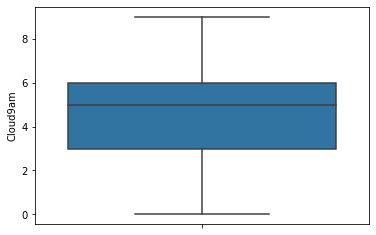

In [137]:
sns.boxplot(y="Cloud9am",data=df)

In [138]:
IQR12=df["Cloud9am"].quantile(0.75)-df["Cloud9am"].quantile(0.25)
print(IQR12)

3.0


In [139]:
upperlimit_11=df["Cloud9am"].quantile(0.75)+1.5*IQR12
lowerlimit_11=df["Cloud9am"].quantile(0.25)-1.5*IQR12
print(upperlimit_11)
print(lowerlimit_11)

10.5
-1.5


In [140]:
out_val12=df[(df["Cloud9am"]>=upperlimit_11) | (df["Cloud9am"]<=lowerlimit_11)]
out_val12

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RISK_MM, RainTomorrow]
Index: []

[0 rows x 24 columns]

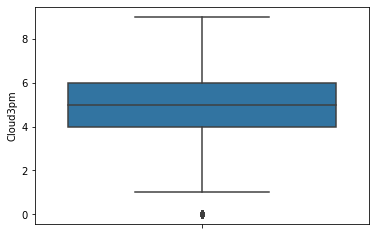

In [141]:
sns.boxplot(y="Cloud3pm",data=df)

In [142]:
IQR13=df["Cloud3pm"].quantile(0.75)-df["Cloud3pm"].quantile(0.25)
print(IQR13)

2.0


In [143]:
upperlimit_12=df["Cloud3pm"].quantile(0.75)+1.5*IQR13
lowerlimit_12=df["Cloud3pm"].quantile(0.25)-1.5*IQR13
print(upperlimit_12)
print(lowerlimit_12)

9.0
1.0


In [144]:
out_val13=df[(df["Cloud3pm"]>=upperlimit_12) | (df["Cloud3pm"]<=lowerlimit_12)]
out_val13

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
15      17-12-2008   Albury     14.1     20.9       0.0          4.8   
16      18-12-2008   Albury     13.5     22.9      16.8          4.8   
20      22-12-2008   Albury     17.1     33.0       0.0          4.8   
24      26-12-2008   Albury     16.2     33.9       0.0          4.8   
25      27-12-2008   Albury     16.9     33.0       0.0          4.8   
...            ...      ...      ...      ...       ...          ...   
142115  08-04-2017    Uluru     14.3     36.8       0.0          4.8   
142121  14-04-2017    Uluru     11.8     29.8       0.0          4.8   
142123  16-04-2017    Uluru     12.5     31.9       0.0          4.8   
142150  13-05-2017    Uluru      6.8     28.7       0.0          4.8   
142162  25-05-2017    Uluru     14.6     26.3       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
15           8.5         ENE           22.0        SSW  ...        82.0   
16           8.5           W           63.0          N  ...        65.0   
20           8.5          NE           43.0         NE  ...        28.0   
24           8.5         WSW           35.0         SE  ...        19.0   
25           8.5         WSW           57.0          N  ...        28.0   
...          ...         ...            ...        ...  ...         ...   
142115       8.5         SSE           37.0        SSE  ...        10.0   
142121       8.5           E           37.0        ESE  ...        10.0   
142123       8.5         ENE           31.0         SE  ...        13.0   
142150       8.5          NW           37.0         SE  ...        19.0   
142162       8.5           S           37.0        SSW  ...        36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
15           1012.2       1010.4       8.0       1.0     17.2     18.1   
16           1005.8       1002.2       8.0       1.0     18.0     21.5   
20           1013.6       1008.1       5.0       1.0     24.5     31.6   
24           1010.9       1007.6       5.0       1.0     23.2     33.0   
25           1006.8       1003.6       5.0       1.0     26.6     31.2   
...             ...          ...       ...       ...      ...      ...   
142115       1016.2       1013.1       5.0       1.0     23.2     34.8   
142121       1021.1       1016.7       5.0       1.0     18.9     28.1   
142123       1016.5       1012.3       8.0       1.0     19.3     30.5   
142150       1016.9       1014.6       5.0       1.0     15.2     27.5   
142162       1022.0       1018.6       7.0       1.0     15.4     25.0   

        RainToday  RISK_MM  RainTomorrow  
15             No     16.8           Yes  
16            Yes     10.6           Yes  
20             No      0.0            No  
24             No      0.0            No  
25             No      0.0            No  
...           ...      ...           ...  
142115         No      0.0            No  
142121         No      0.0            No  
142123         No      0.0            No  
142150         No      0.0            No  
142162         No      0.4            No  

[19785 rows x 24 columns]

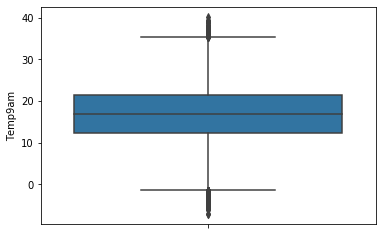

In [145]:
sns.boxplot(y="Temp9am",data=df)

In [146]:
IQR14=df["Temp9am"].quantile(0.75)-df["Temp9am"].quantile(0.25)
print(IQR14)

9.2


In [147]:
upperlimit_13=df["Temp9am"].quantile(0.75)+1.5*IQR14
lowerlimit_13=df["Temp9am"].quantile(0.25)-1.5*IQR14
print(upperlimit_13)
print(lowerlimit_13)

35.3
-1.4999999999999982


In [148]:
out_val14=df[(df["Temp9am"]>=upperlimit_13) | (df["Temp9am"]<=lowerlimit_13)]
out_val14

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5780    18-01-2017  BadgerysCreek     23.0     44.4       0.0          4.8   
5975    06-02-2009          Cobar     29.1     43.5       0.0         13.0   
6261    20-11-2009          Cobar     28.8     45.4       0.0         17.0   
6693    26-01-2011          Cobar     25.7     44.3       0.0         12.0   
7350    18-01-2013          Cobar     29.4     43.8       0.0         13.6   
...            ...            ...      ...      ...       ...          ...   
140977  01-01-2014          Uluru     24.7     44.4       0.0          4.8   
141249  13-11-2014          Uluru     23.4     43.0       0.0          4.8   
141317  20-01-2015          Uluru     28.6     43.7       0.0          4.8   
141624  25-11-2015          Uluru     23.1     41.9       0.0          4.8   
141634  05-12-2015          Uluru     20.0     44.1       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
5780         8.5         WNW           52.0        WNW  ...        48.0   
5975        12.1         WNW           28.0        NNW  ...        16.0   
6261         8.8           N           56.0          N  ...         6.0   
6693         8.5         WNW           39.0          N  ...        14.0   
7350         8.5         WNW           52.0         NW  ...        14.0   
...          ...         ...            ...        ...  ...         ...   
140977       8.5           W           54.0        ENE  ...        15.0   
141249       8.5          NW           85.0        NNE  ...         9.0   
141317       8.5         WSW           48.0        WSW  ...         8.0   
141624       8.5          SW           69.0        NNW  ...         8.0   
141634       8.5         NNW           57.0         NE  ...        10.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
5780         1005.6       1005.8       5.0       5.0     37.6     30.9   
5975         1007.5       1005.2       1.0       2.0     35.6     41.4   
6261         1008.2       1004.4       1.0       6.0     37.3     43.3   
6693         1009.9       1008.9       1.0       5.0     35.7     43.2   
7350         1004.4       1001.5       3.0       7.0     37.7     42.9   
...             ...          ...       ...       ...      ...      ...   
140977       1007.5       1003.8       5.0       5.0     36.0     42.0   
141249       1007.2       1002.4       5.0       1.0     35.6     41.5   
141317       1007.2       1005.3       5.0       5.0     36.4     42.2   
141624       1006.1       1002.7       1.0       5.0     35.5     40.1   
141634       1010.5       1005.3       5.0       2.0     36.1     41.5   

        RainToday  RISK_MM  RainTomorrow  
5780           No      0.2            No  
5975           No      0.0            No  
6261           No      0.0            No  
6693           No      0.0            No  
7350           No      0.0            No  
...           ...      ...           ...  
140977         No      0.0            No  
141249         No      2.8           Yes  
141317         No      0.0            No  
141624         No      0.0            No  
141634         No      0.0            No  

[303 rows x 24 columns]

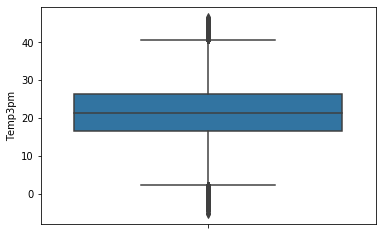

In [149]:
sns.boxplot(y="Temp3pm",data=df)

In [150]:
IQR15=df["Temp3pm"].quantile(0.75)-df["Temp3pm"].quantile(0.25)
print(IQR15)

9.600000000000001


In [151]:
upperlimit_14=df["Temp3pm"].quantile(0.75)+1.5*IQR15
lowerlimit_14=df["Temp3pm"].quantile(0.25)-1.5*IQR15
print(upperlimit_14)
print(lowerlimit_14)

40.7
2.299999999999997


In [152]:
out_val15=df[(df["Temp3pm"]>=upperlimit_14) | (df["Temp3pm"]<=lowerlimit_14)]
out_val15

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
43      14-01-2009   Albury     17.4     43.0       0.0          4.8   
59      30-01-2009   Albury     22.3     42.9       0.0          4.8   
60      31-01-2009   Albury     22.0     42.7       0.0          4.8   
61      01-02-2009   Albury     28.0     43.1       0.0          4.8   
66      06-02-2009   Albury     23.5     42.2       0.0          4.8   
...            ...      ...      ...      ...       ...          ...   
141634  05-12-2015    Uluru     20.0     44.1       0.0          4.8   
141698  13-02-2016    Uluru     22.0     42.3       0.0          4.8   
141988  01-12-2016    Uluru     20.1     42.2       0.0          4.8   
142000  13-12-2016    Uluru     16.7     41.7       0.0          4.8   
142091  15-03-2017    Uluru     17.9     41.9       0.0          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
43           8.5          NW           39.0        SSE  ...         8.0   
59           8.5         NNE           28.0        ESE  ...        11.0   
60           8.5         ESE           48.0        ESE  ...        11.0   
61           8.5          SW           83.0         SE  ...         9.0   
66           8.5           W           37.0         SE  ...         8.0   
...          ...         ...            ...        ...  ...         ...   
141634       8.5         NNW           57.0         NE  ...        10.0   
141698       8.5          SW           31.0          E  ...         8.0   
141988       8.5         WNW           54.0         NE  ...         8.0   
142000       8.5          SW           61.0        NNE  ...         7.0   
142091       8.5           S           43.0         SE  ...        15.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
43           1011.6       1006.9       5.0       5.0     25.6     41.5   
59           1014.6       1010.2       5.0       5.0     29.2     41.2   
60           1014.2       1010.5       5.0       5.0     29.9     42.0   
61           1012.5       1008.7       5.0       5.0     32.4     41.9   
66           1008.0       1005.0       5.0       5.0     28.7     41.6   
...             ...          ...       ...       ...      ...      ...   
141634       1010.5       1005.3       5.0       2.0     36.1     41.5   
141698       1011.1       1007.0       5.0       5.0     31.8     41.0   
141988       1006.4       1002.1       5.0       3.0     33.2     41.1   
142000       1006.1       1002.6       5.0       5.0     33.2     41.1   
142091       1009.7       1005.0       5.0       5.0     27.0     40.8   

        RainToday  RISK_MM  RainTomorrow  
43             No      0.0            No  
59             No      0.0            No  
60             No      0.0            No  
61             No      0.2            No  
66             No      0.0            No  
...           ...      ...           ...  
141634         No      0.0            No  
141698         No      0.0            No  
141988         No      0.0            No  
142000         No      0.0            No  
142091         No      0.0            No  

[863 rows x 24 columns]

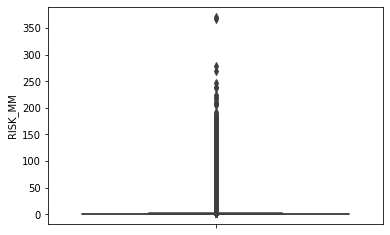

In [153]:
sns.boxplot(y="RISK_MM",data=df)

In [154]:
IQR16=df["RISK_MM"].quantile(0.75)-df["RISK_MM"].quantile(0.25)
print(IQR16)

0.8


In [155]:
upperlimit_15=df["RISK_MM"].quantile(0.75)+1.5*IQR16
lowerlimit_15=df["RISK_MM"].quantile(0.25)-1.5*IQR16
print(upperlimit_15)
print(lowerlimit_15)

2.0
-1.2000000000000002


In [156]:
out_val16=df[(df["RISK_MM"]>=upperlimit_15) | (df["RISK_MM"]<=lowerlimit_15)]
out_val16

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
10      11-12-2008   Albury     13.4     30.4       0.0          4.8   
11      12-12-2008   Albury     15.9     21.7       2.2          4.8   
12      13-12-2008   Albury     15.9     18.6      15.6          4.8   
15      17-12-2008   Albury     14.1     20.9       0.0          4.8   
16      18-12-2008   Albury     13.5     22.9      16.8          4.8   
...            ...      ...      ...      ...       ...          ...   
142059  10-02-2017    Uluru     24.8     39.8       0.4          4.8   
142124  17-04-2017    Uluru     19.3     24.4       0.0          4.8   
142125  18-04-2017    Uluru     15.2     21.5       6.8          4.8   
142126  19-04-2017    Uluru     17.7     26.9      12.6          4.8   
142127  20-04-2017    Uluru     18.6     28.6      34.6          4.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
10           8.5           N           30.0        SSE  ...        22.0   
11           8.5         NNE           31.0         NE  ...        91.0   
12           8.5           W           61.0        NNW  ...        93.0   
15           8.5         ENE           22.0        SSW  ...        82.0   
16           8.5           W           63.0          N  ...        65.0   
...          ...         ...            ...        ...  ...         ...   
142059       8.5         WNW           65.0          E  ...        24.0   
142124       8.5           W           35.0        ESE  ...        91.0   
142125       8.5         ENE           30.0         NE  ...        65.0   
142126       8.5           S           35.0          E  ...        59.0   
142127       8.5           E           46.0          E  ...        56.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
10           1011.8       1008.7       5.0       5.0     20.4     28.8   
11           1010.5       1004.2       8.0       8.0     15.9     17.0   
12            994.3        993.0       8.0       8.0     17.4     15.8   
15           1012.2       1010.4       8.0       1.0     17.2     18.1   
16           1005.8       1002.2       8.0       1.0     18.0     21.5   
...             ...          ...       ...       ...      ...      ...   
142059       1007.0       1003.6       5.0       5.0     31.5     36.6   
142124       1015.9       1013.9       8.0       8.0     21.3     18.5   
142125       1016.9       1015.3       3.0       8.0     19.0     21.2   
142126       1018.1       1014.7       7.0       8.0     19.0     26.0   
142127       1020.0       1015.8       8.0       5.0     19.8     26.9   

        RainToday  RISK_MM  RainTomorrow  
10             No      2.2           Yes  
11            Yes     15.6           Yes  
12            Yes      3.6           Yes  
15             No     16.8           Yes  
16            Yes     10.6           Yes  
...           ...      ...           ...  
142059         No      6.2           Yes  
142124         No      6.8           Yes  
142125        Yes     12.6           Yes  
142126        Yes     34.6           Yes  
142127        Yes      3.8           Yes  

[26609 rows x 24 columns]

In [160]:
df["MinTemp"].quantile(0.95)

23.0

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

In [158]:
df.shape

(142193, 24)

In [159]:
out_val1=df[(df["MinTemp"]>=upperlimit) | (df["MinTemp"]<=lowerlimit)].index.tolist()
len(out_val1)

62

In [171]:
for i in out_val1:
    df["MinTemp"][i]=df["MinTemp"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


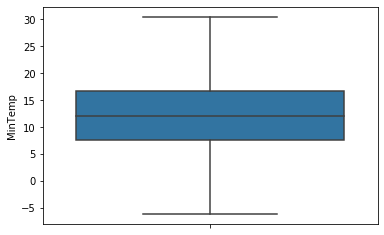

In [172]:
sns.boxplot(y="MinTemp",data=df)

In [173]:
out_val2=df[(df["MaxTemp"]>=upperlimit_1) | (df["MaxTemp"]<=lowerlimit_1)].index.tolist()
len(out_val2)

459

In [174]:
df["MaxTemp"].quantile(0.95)

35.5

In [175]:
for i in out_val2:
    df["MaxTemp"][i]=df["MaxTemp"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


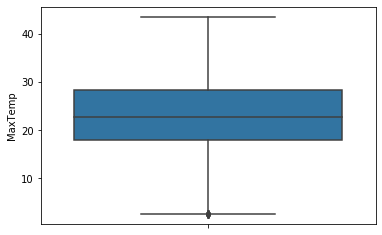

In [176]:
sns.boxplot(y="MaxTemp",data=df)

In [177]:
out_val3=df[(df["Rainfall"]>=upperlimit_2) | (df["Rainfall"]<=lowerlimit_2)].index.tolist()
len(out_val3)

28559

In [185]:
df["Rainfall"].quantile(0.79)

1.4

In [187]:
for i in out_val3:
    df["Rainfall"][i]=df["Rainfall"].quantile(0.79)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


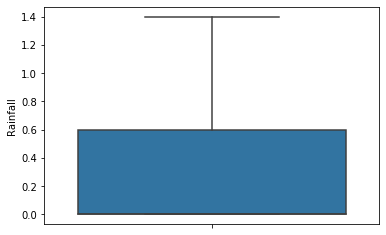

In [188]:
sns.boxplot(y="Rainfall",data=df)

In [189]:
out_val4=df[(df["Evaporation"]>=upperlimit_3) | (df["Evaporation"]<=lowerlimit_3)].index.tolist()
len(out_val4)

32317

In [192]:
df["Evaporation"].quantile(0.85)

7.2

In [193]:
for i in out_val4:
    df["Evaporation"][i]=df["Evaporation"].quantile(0.85)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


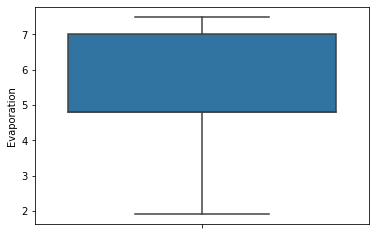

In [194]:
sns.boxplot(y="Evaporation",data=df)

In [195]:
out_val5=df[(df["Sunshine"]>=upperlimit_4) | (df["Sunshine"]<=lowerlimit_4)].index.tolist()
len(out_val5)

60823

In [200]:
df["Sunshine"].quantile(0.78)

9.3

In [201]:
for i in out_val5:
    df["Sunshine"][i]=df["Sunshine"].quantile(0.78)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


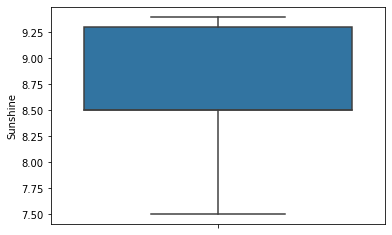

In [202]:
sns.boxplot(y="Sunshine",data=df)

In [203]:
out_val6=df[(df["WindSpeed9am"]>=upperlimit_5) | (df["WindSpeed9am"]<=lowerlimit_5)].index.tolist()
len(out_val6)

2313

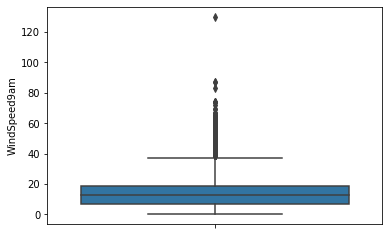

In [204]:
sns.boxplot(y="WindSpeed9am",data=df)

In [205]:
df["WindSpeed9am"].quantile(0.95)

30.0

In [206]:
for i in out_val6:
    df["WindSpeed9am"][i]=df["WindSpeed9am"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


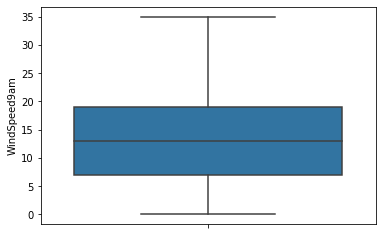

In [207]:
sns.boxplot(y="WindSpeed9am",data=df)

In [208]:
out_val7=df[(df["WindSpeed3pm"]>=upperlimit_6) | (df["WindSpeed3pm"]<=lowerlimit_6)].index.tolist()
len(out_val7)

2458

In [209]:
df["WindSpeed3pm"].quantile(0.95)

33.0

In [210]:
for i in out_val7:
    df["WindSpeed3pm"][i]=df["WindSpeed3pm"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


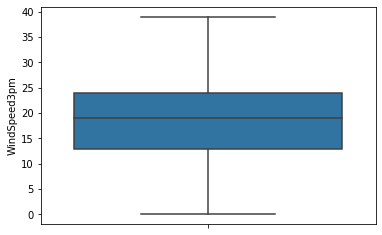

In [211]:
sns.boxplot(y="WindSpeed3pm",data=df)

In [212]:
out_val8=df[(df["Humidity9am"]>=upperlimit_7) | (df["Humidity9am"]<=lowerlimit_7)].index.tolist()
len(out_val8)

1618

In [213]:
df["Humidity9am"].quantile(0.95)

98.0

In [214]:
for i in out_val8:
    df["Humidity9am"][i]=df["Humidity9am"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


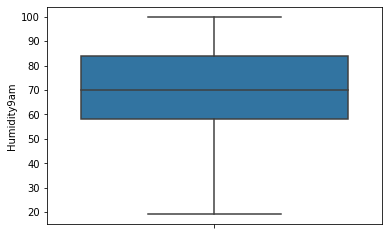

In [215]:
sns.boxplot(y="Humidity9am",data=df)

In [216]:
out_val9=df[(df["Humidity3pm"]>=upperlimit_8) | (df["Humidity3pm"]<=lowerlimit_8)].index.tolist()
len(out_val9)

33433

In [219]:
df["Humidity3pm"].quantile(0.85)

73.0

In [220]:
for i in out_val9:
    df["Humidity3pm"][i]=df["Humidity3pm"].quantile(0.85)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


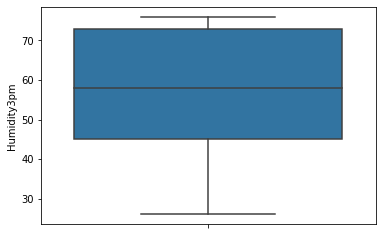

In [221]:
sns.boxplot(y="Humidity3pm",data=df)

In [222]:
out_val10=df[(df["Pressure9am"]>=upperlimit_9) | (df["Pressure9am"]<=lowerlimit_9)].index.tolist()
len(out_val10)

2708

In [223]:
df["Pressure9am"].quantile(0.95)

1029.1

In [224]:
for i in out_val10:
    df["Pressure9am"][i]=df["Pressure9am"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


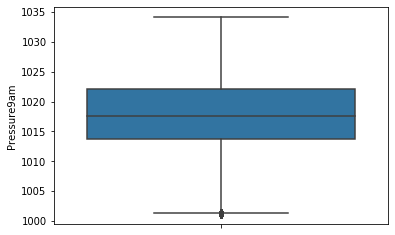

In [225]:
sns.boxplot(y="Pressure9am",data=df)

In [226]:
out_val11=df[(df["Pressure3pm"]>=upperlimit_10) | (df["Pressure3pm"]<=lowerlimit_10)].index.tolist()
len(out_val11)

2367

In [227]:
df["Pressure3pm"].quantile(0.95)

1026.6

In [228]:
for i in out_val11:
    df["Pressure3pm"][i]=df["Pressure3pm"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


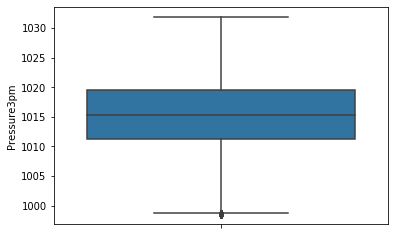

In [229]:
sns.boxplot(y="Pressure3pm",data=df)

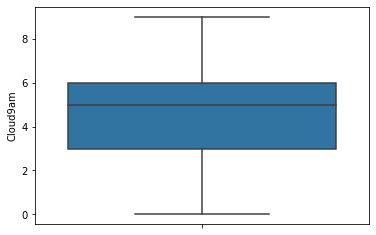

In [230]:
sns.boxplot(y="Cloud9am",data=df)

In [231]:
out_val13=df[(df["Cloud3pm"]>=upperlimit_12) | (df["Cloud3pm"]<=lowerlimit_12)].index.tolist()
len(out_val13)

19785

In [232]:
df["Cloud3pm"].quantile(0.95)

8.0

In [233]:
for i in out_val13:
    df["Cloud3pm"][i]=df["Cloud3pm"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


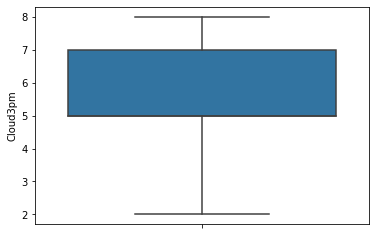

In [234]:
sns.boxplot(y="Cloud3pm",data=df)

In [235]:
out_val14=df[(df["Temp9am"]>=upperlimit_13) | (df["Temp9am"]<=lowerlimit_13)].index.tolist()
len(out_val14)

303

In [236]:
df["Temp9am"].quantile(0.95)

28.199999999999996

In [237]:
for i in out_val14:
    df["Temp9am"][i]=df["Temp9am"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


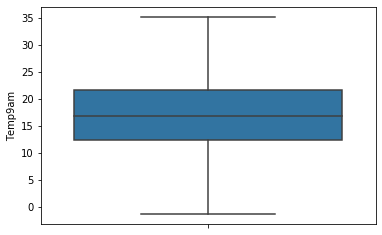

In [238]:
sns.boxplot(y="Temp9am",data=df)

In [239]:
out_val15=df[(df["Temp3pm"]>=upperlimit_14) | (df["Temp3pm"]<=lowerlimit_14)].index.tolist()
len(out_val15)

863

In [241]:
df["Temp3pm"].quantile(0.95)

33.6

In [242]:
for i in out_val15:
    df["Temp3pm"][i]=df["Temp3pm"].quantile(0.95)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


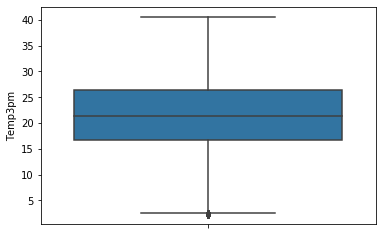

In [243]:
sns.boxplot(y="Temp3pm",data=df)

In [244]:
out_val16=df[(df["RISK_MM"]>=upperlimit_15) | (df["RISK_MM"]<=lowerlimit_15)].index.tolist()
len(out_val16)

26609

In [248]:
df["RISK_MM"].quantile(0.8)

1.6

In [249]:
for i in out_val16:
    df["RISK_MM"][i]=df["RISK_MM"].quantile(0.8)

C:\Users\Vishal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


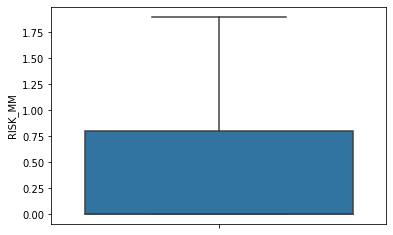

In [250]:
sns.boxplot(y="RISK_MM",data=df)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

In [252]:
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Albury     13.4     22.9       0.6          4.8       8.5   
1  02-12-2008   Albury      7.4     25.1       0.0          4.8       8.5   
2  03-12-2008   Albury     12.9     25.7       0.0          4.8       8.5   
3  04-12-2008   Albury      9.2     28.0       0.0          4.8       8.5   
4  05-12-2008   Albury     17.5     32.3       1.0          4.8       8.5   
5  06-12-2008   Albury     14.6     29.7       0.2          4.8       8.5   
6  07-12-2008   Albury     14.3     25.0       0.0          4.8       8.5   
7  08-12-2008   Albury      7.7     26.7       0.0          4.8       8.5   
8  09-12-2008   Albury      9.7     31.9       0.0          4.8       8.5   
9  10-12-2008   Albury     13.1     30.1       1.4          4.8       8.5   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        73.0       1007.7   
1         WNW           44.0        NNW  ...        73.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        73.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   
5         WNW           56.0          W  ...        73.0       1009.2   
6           W           50.0         SW  ...        73.0       1009.6   
7           W           35.0        SSE  ...        73.0       1013.4   
8         NNW           80.0         SE  ...        73.0       1008.9   
9           W           28.0          S  ...        27.0       1007.0   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       5.0     16.9     21.8         No      0.0   
1       1007.8       5.0       5.0     17.2     24.3         No      0.0   
2       1008.7       5.0       2.0     21.0     23.2         No      0.0   
3       1012.8       5.0       5.0     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   
5       1005.4       5.0       5.0     20.6     28.9         No      0.0   
6       1008.2       1.0       5.0     18.1     24.6         No      0.0   
7       1010.1       5.0       5.0     16.3     25.5         No      0.0   
8       1003.6       5.0       5.0     18.3     30.2         No      1.4   
9       1005.7       5.0       5.0     20.1     28.2        Yes      0.0   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 24 columns]

In [296]:
df_dummies=pd.get_dummies(df,drop_first=True,columns=["RainToday"])
df_dummies.drop(columns=["Date","Location","WindGustDir","WindDir9am","WindDir3pm"],inplace=True)



In [297]:
df_dummies.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.8       8.5           44.0   
1      7.4     25.1       0.0          4.8       8.5           44.0   
2     12.9     25.7       0.0          4.8       8.5           46.0   
3      9.2     28.0       0.0          4.8       8.5           24.0   
4     17.5     32.3       1.0          4.8       8.5           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         73.0       1007.7   
1           4.0          22.0         44.0         73.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         73.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  RainToday_Yes  
0       1007.1       8.0       5.0     16.9     21.8      0.0              0  
1       1007.8       5.0       5.0     17.2     24.3      0.0              0  
2       1008.7       5.0       2.0     21.0     23.2      0.0              0  
3       1012.8       5.0       5.0     18.1     26.5      1.0              0  
4       1006.0       7.0       8.0     17.8     29.7      0.2              0

In [298]:
X=df_dummies.iloc[:,:-1].values

In [299]:
X

array([[13.4, 22.9,  0.6, ..., 16.9, 21.8,  0. ],
       [ 7.4, 25.1,  0. , ..., 17.2, 24.3,  0. ],
       [12.9, 25.7,  0. , ..., 21. , 23.2,  0. ],
       ...,
       [ 3.6, 25.3,  0. , ..., 10.9, 24.5,  0. ],
       [ 5.4, 26.9,  0. , ..., 12.5, 26.1,  0. ],
       [ 7.8, 27. ,  0. , ..., 15.1, 26. ,  0. ]])

In [300]:
y=df_dummies.iloc[:,-1].values

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [302]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [303]:
y_pred=model.predict(X_test)

In [308]:
X_test

array([[17.4, 29. ,  0. , ..., 26.1, 27.8,  0. ],
       [ 6.8, 14.4,  0.8, ..., 10.4, 12.7,  0. ],
       [10.1, 15.4,  1.4, ..., 12.3, 13. ,  0. ],
       ...,
       [ 8.2, 13.7,  1.4, ..., 11.9, 13.2,  1.2],
       [11.5, 25.1,  0. , ..., 15.7, 24.3,  0. ],
       [21.8, 35.2,  0. , ..., 31.1, 31.6,  0. ]])

In [304]:
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [306]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9017769234375732


In [307]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     33183
           1       0.81      0.73      0.77      9475

    accuracy                           0.90     42658
   macro avg       0.87      0.84      0.85     42658
weighted avg       0.90      0.90      0.90     42658



In [309]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[31581  1602]
 [ 2588  6887]]


In [316]:
y_pred=model.predict([[13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,73.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0]])
y_pred

array([0], dtype=uint8)

In [322]:
y_pred=model.predict([[13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,73.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0]])
y_pred

array([0], dtype=uint8)

### Finally we conclude that by using some of the variables like Temp, Pressure, Wind speed, we probably tell that whether the rain or not.


## The accuracy of about 90%.
##  Precision of about 92%.